In [1]:
# imports
import numpy as np
from pylab import *
from preprocessing import get_preprocessed_data
from features import find_peaks
import audioFeatureExtraction

In [2]:
x_dataA, y_labelA, framerate_A = get_preprocessed_data('A', N=2, factor=10)

x_dataB, y_labelB, framerate_B = get_preprocessed_data('B', N=2, factor=5)

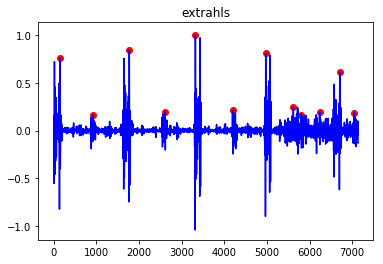

In [4]:
# get peaks for A
dataA_peaks = find_peaks(x_dataA, 'A')

'''n = 50
figure()
title(y_labelA[n])
plot(x_dataA[n],'b')
scatter(dataA_peaks[n],x_dataA[n][dataA_peaks[n]],c='r')
show()'''

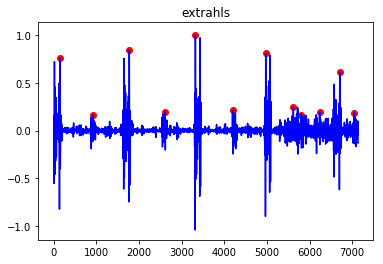

In [76]:
n = 50
figure()
title(y_labelA[n])
plot(x_dataA[n],'b')
scatter(dataA_peaks[n],x_dataA[n][dataA_peaks[n]],c='r')
show()

In [14]:
# get peaks for B
dataB_peaks = find_peaks(x_dataB, 'B')

'''n = 140
figure()
title(y_labelB[n])
plot(x_dataB[n],'b')
scatter(dataB_peaks[n],x_dataB[n][dataB_peaks[n]],c='r')
show()'''

"n = 140\nfigure()\ntitle(y_labelB[n])\nplot(x_dataB[n],'b')\nscatter(dataB_peaks[n],x_dataB[n][dataB_peaks[n]],c='r')\nshow()"

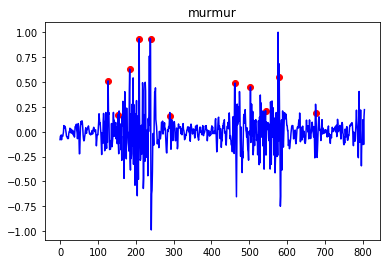

In [73]:
n = 65
figure()
title(y_labelB[n])
plot(x_dataB[n],'b')
scatter(dataB_peaks[n],x_dataB[n][dataB_peaks[n]],c='r')
show()

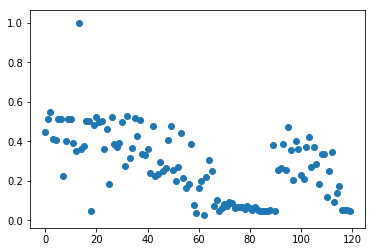

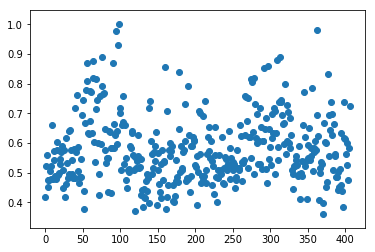

In [24]:
# zero crossing rate of frame 
zero_crossingsA = np.array([audioFeatureExtraction.stZCR(x) for x in x_dataA])
zero_crossingsA = zero_crossingsA/max(zero_crossingsA)
zero_crossingsB = np.array([audioFeatureExtraction.stZCR(x) for x in x_dataB])
zero_crossingsB = zero_crossingsB/max(zero_crossingsB)
figure()
scatter(range(0,len(x_dataA)),zero_crossingsA)
show()
figure()
scatter(range(0,len(x_dataB)),zero_crossingsB)
show()

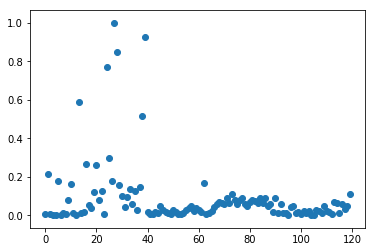

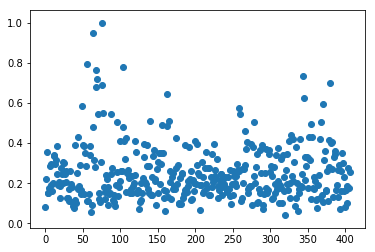

In [25]:
# signal energy of frame
energyA = np.array([audioFeatureExtraction.stEnergy(x) for x in x_dataA])
energyA = energyA/max(energyA)
energyB = np.array([audioFeatureExtraction.stEnergy(x) for x in x_dataB])
energyB = energyB/max(energyB)
figure()
scatter(range(0,len(x_dataA)),energyA)
show()
figure()
scatter(range(0,len(x_dataB)),energyB)
show()

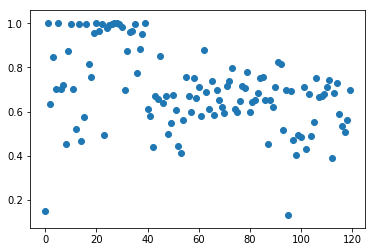

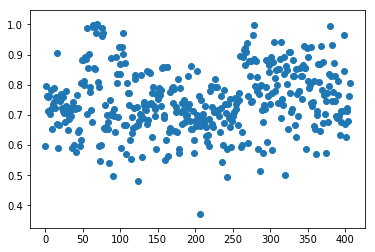

In [26]:
# entropy of energy
entropyA = np.array([audioFeatureExtraction.stEnergyEntropy(x, numOfShortBlocks=50) for x in x_dataA])
entropyA = entropyA/max(entropyA)
entropyB = np.array([audioFeatureExtraction.stEnergyEntropy(x, numOfShortBlocks=50) for x in x_dataB])
entropyB = entropyB/max(entropyB)
figure()
scatter(range(0,len(x_dataA)),entropyA)
show()
figure()
scatter(range(0,len(x_dataB)),entropyB)
show()

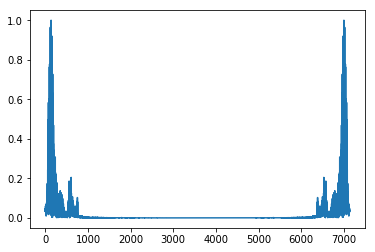

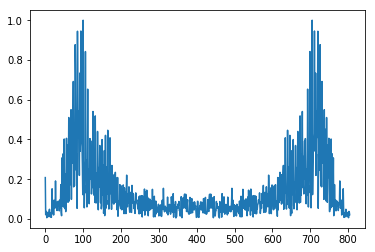

In [27]:
# frequency domain
X_dataA = np.array([np.fft.fft(x) for x in x_dataA])
X_dataA = np.array([np.abs(X)/max(np.abs(X)) for X in X_dataA])
figure()
plot(X_dataA[70])
show()

X_dataB = np.array([np.fft.fft(x) for x in x_dataB])
X_dataB = np.array([np.abs(X)/max(np.abs(X)) for X in X_dataB])
figure()
plot(X_dataB[300])
show()

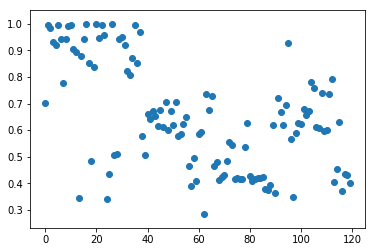

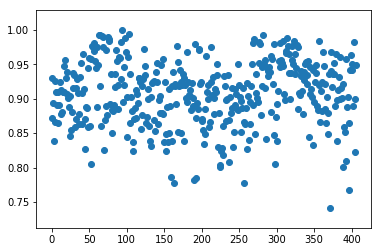

In [28]:
# spectral entropy
entropy_freqA = np.array([audioFeatureExtraction.stSpectralEntropy(X, numOfShortBlocks=150) for X in X_dataA])
entropy_freqA = entropy_freqA/max(entropy_freqA)
entropy_freqB = np.array([audioFeatureExtraction.stSpectralEntropy(X, numOfShortBlocks=150) for X in X_dataB])
entropy_freqB = entropy_freqB/max(entropy_freqB)
figure()
scatter(range(0,len(X_dataA)),entropy_freqA)
show()
figure()
scatter(range(0,len(X_dataB)),entropy_freqB)
show()

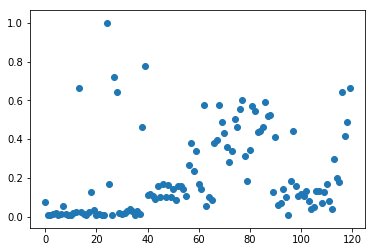

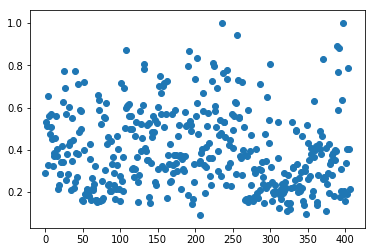

In [30]:
# spectral flux
fluxA = np.array([np.abs(audioFeatureExtraction.stSpectralFlux(X[:int(len(X)/2)], X[int(len(X)/2):])) for X in X_dataA])
fluxA = fluxA/max(fluxA)
fluxB = np.array([np.abs(audioFeatureExtraction.stSpectralFlux(X[:int(len(X)/2)], X[int(len(X)/2)+1:])) for X in X_dataB])
fluxB = fluxB/max(fluxB)
figure()
scatter(range(0,len(X_dataA)),fluxA)
show()
figure()
scatter(range(0,len(X_dataB)),fluxB)
show()

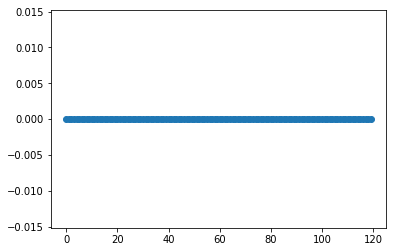

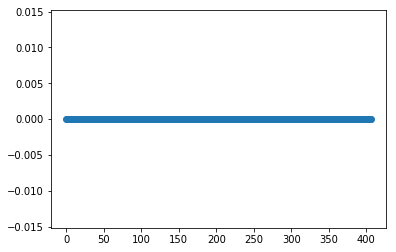

In [33]:
# spectral roll-off
c = 343 # speed of sound
FsA = int(framerate_A[0]/10) # framerate is the same for all of set A
FsB = int(framerate_B[0]/5) # framerate is the same for all of set B

rolloffA = np.array([audioFeatureExtraction.stSpectralRollOff(X,c,FsA) for X in X_dataA])
rolloffB = np.array([audioFeatureExtraction.stSpectralRollOff(X,c,FsB) for X in X_dataB])

figure()
scatter(range(0,len(X_dataA)),rolloffA)
show()
figure()
scatter(range(0,len(X_dataB)),rolloffB)
show()

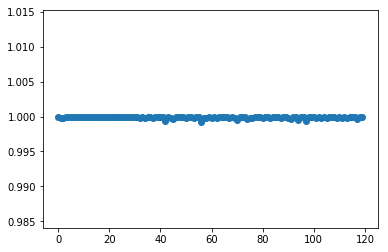

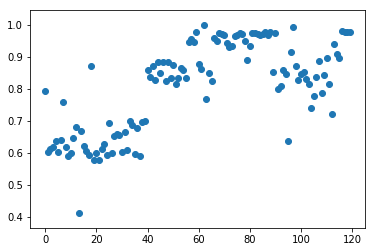

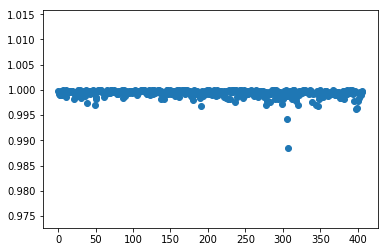

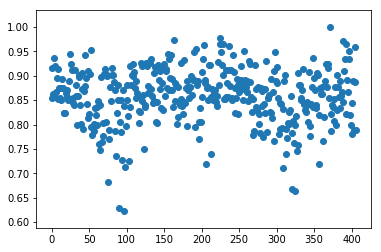

In [31]:
# spectral centroid of frame (given abs(FFT))
FsA = int(framerate_A[0]/10) # framerate is the same for all of set A
FsB = int(framerate_B[0]/5) # framerate is the same for all of set B

centroidA = np.array([audioFeatureExtraction.stSpectralCentroidAndSpread(np.abs(X),FsA) for X in X_dataA])
centroidA[:,0] = centroidA[:,0]/max(centroidA[:,0])
centroidA[:,1] = centroidA[:,1]/max(centroidA[:,1])
centroidB = np.array([audioFeatureExtraction.stSpectralCentroidAndSpread(np.abs(X),FsB) for X in X_dataB])
centroidB[:,0] = centroidB[:,0]/max(centroidB[:,0])
centroidB[:,1] = centroidB[:,1]/max(centroidB[:,1])
figure()
scatter(range(0,len(X_dataA)),centroidA[:,0]) #centroid of A
show()
figure()
scatter(range(0,len(X_dataA)),centroidA[:,1]) #spread of A
show()
figure()
scatter(range(0,len(X_dataB)),centroidB[:,0]) #centroid of B
show()
figure()
scatter(range(0,len(X_dataB)),centroidB[:,1]) #spread of B
show()

In [90]:
# features to use
# zero_crossings, energy, entropy, entropy frequency, flux, spread
x_trainA = np.column_stack((zero_crossingsA, energyA, entropyA, entropy_freqA, fluxA, centroidA[:,1]))
x_trainB = np.column_stack((zero_crossingsB, energyB, entropyB, entropy_freqB, fluxB, centroidB[:,1]))
print(x_trainA.shape)
print(x_trainB.shape)

(120, 6)
(407, 6)


In [95]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_trainA = le.fit_transform(y_labelA) # 0 - artifact, 1 - extrahls, 2 - murmur, 3 - normal
y_trainB = le.fit_transform(y_labelB)
print(y_trainA.shape)
print(y_trainB.shape)

(120,)
(407,)


In [102]:
# shuffle data and test/train split 
from sklearn.model_selection import ShuffleSplit
rsA = ShuffleSplit(n_splits=5, test_size=.20, random_state=0)
rsA.get_n_splits(x_trainA)
rsB = ShuffleSplit(n_splits=5, test_size=.20, random_state=0)
rsB.get_n_splits(x_trainB)

5

In [103]:
# classifier
from sklearn import tree
resultsA_dt = []
for train_index, test_index in rsA.split(x_trainA):
    clfA = tree.DecisionTreeClassifier()
    resultsA_dt.append(clf.fit(x_trainA[train_index], y_trainA[train_index]).score(x_trainA[test_index],y_trainA[test_index]))
print(resultsA_dt)

resultsB_dt = []
for train_index, test_index in rsB.split(x_trainB):
    clfB = tree.DecisionTreeClassifier()
    resultsB_dt.append(clfB.fit(x_trainB[train_index], y_trainB[train_index]).score(x_trainB[test_index],y_trainB[test_index]))
print(resultsB_dt)

[0.66666666666666663, 0.66666666666666663, 0.625, 0.625, 0.625]
[0.5, 0.48780487804878048, 0.48780487804878048, 0.52439024390243905, 0.51219512195121952]


In [106]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
resultsA_ada = []
for train_index, test_index in rsA.split(x_trainA):
    adaA = AdaBoostClassifier()
    resultsA_ada.append(ada.fit(x_trainA[train_index], y_trainA[train_index]).score(x_trainA[test_index],y_trainA[test_index]))
print(results_ada)

resultsB_ada = []
for train_index, test_index in rsB.split(x_trainB):
    adaB = AdaBoostClassifier()
    resultsB_ada.append(adaB.fit(x_trainB[train_index], y_trainB[train_index]).score(x_trainB[test_index],y_trainB[test_index]))
print(resultsB_ada)

[0.58333333333333337, 0.75, 0.70833333333333337]
[0.63414634146341464, 0.57317073170731703, 0.5, 0.54878048780487809, 0.6097560975609756]


In [107]:
from sklearn.naive_bayes import GaussianNB
resultsA_gnb = []
for train_index, test_index in rsA.split(x_trainA):
    gnbA = GaussianNB()
    resultsA_gnb.append(gnb.fit(x_trainA[train_index], y_trainA[train_index]).score(x_trainA[test_index],y_trainA[test_index]))
print(resultsA_gnb) 

resultsB_gnb = []
for train_index, test_index in rsB.split(x_trainB):
    gnbB = GaussianNB()
    resultsB_gnb.append(gnb.fit(x_trainB[train_index], y_trainB[train_index]).score(x_trainB[test_index],y_trainB[test_index]))
print(resultsB_gnb) 

[0.625, 0.79166666666666663, 0.70833333333333337, 0.66666666666666663, 0.625]
[0.65853658536585369, 0.56097560975609762, 0.62195121951219512, 0.63414634146341464, 0.54878048780487809]


In [108]:
resultsA_gb = []
for train_index, test_index in rsA.split(x_trainA):
    gbA = GradientBoostingClassifier()
    resultsA_gb.append(gbA.fit(x_trainA[train_index], y_trainA[train_index]).score(x_trainA[test_index],y_trainA[test_index]))
print(resultsA_ada)

resultsB_gb = []
for train_index, test_index in rsB.split(x_trainB):
    gbB = GradientBoostingClassifier()
    resultsB_gb.append(gbB.fit(x_trainB[train_index], y_trainB[train_index]).score(x_trainB[test_index],y_trainB[test_index]))
print(resultsB_ada)

[0.58333333333333337, 0.75, 0.70833333333333337, 0.41666666666666669, 0.16666666666666666]
[0.63414634146341464, 0.57317073170731703, 0.5, 0.54878048780487809, 0.6097560975609756]
